### Biom Checks:

1. Sequences per sample
2. Metadata available
3. Included in Downstream Analysis



In [2]:
import glob
import subprocess
import sys
import os
import shutil
import pandas as pd
#import argonne_low_level as ll
import time
import argparse


In [26]:
# qc checker: 
# take a fastq/a file and return seq count.

def seq_counter(file_in, log_file):
    seq_count = 0
    with open(file_in, 'r') as f:
        for line in f.readlines():
            if line.startswith('>') or line.startswith('@'):
                seq_count += 1
    print(seq_count)

In [28]:
seq_counter('../Seq_data/raw_EMP_reads/paired/fastqjoin.join.fastq', 's')

14381534


In [7]:
# subset fasta files:
def subset_fastq(file_in, file_out, seq_out = 10000):
    header_count = 0
    with open(file_in, 'r') as f:
        with open(file_out, 'w') as g:
            
            for line in f:
                if header_count > seq_out:
                    break
                g.write(line)
                if line.startswith('@M047'):
                    header_count += 1



                    
                    

In [9]:
#subset_fastq('./raw_EMP_reads/barcodes.fastq', './raw_EMP_reads/barcodes_subset.fastq')
subset_fastq('./raw_EMP_reads/forward.fastq', './raw_EMP_reads/forward_subset.fastq')
subset_fastq('./raw_EMP_reads/reverse.fastq', './raw_EMP_reads/reverse_subset.fastq')

In [24]:
def arg_seq_relabeler(post_QC, relabeled):
    """Relabels sequences labeled with Illumina information and QIIME's split_libraries_fastq headers.
    Uses the mapping file to match barcodes with sample IDs.
    """

    with open(post_QC, 'r') as f:
        with open(relabeled, 'w') as g:
            for line in f:
                if line.startswith('>'):
                    header = line.split(' ')[0]
                    bc = line.split('orig_bc=')[1].split(' ')[0]
                    header = header.rsplit('_',1)
                    new_header = header[0].replace('_', '.')
                    line = new_header + '_' + header[-1]+ ';barcodelabel=' + bc +"\n"
                g.write(line)
                
                
                

In [23]:
arg_seq_relabeler('../Seq_data_test/split_libraries/filtered.fasta', '../Seq_data_test/relabel.fa')

In [4]:
seq_data = pd.read_csv('../../../Seq_data/vsearch/biom_summary.txt', sep=':', skiprows=14)
seq_data

,Counts/sample detail,Unnamed: 1
0,W4.D9.A,281.0
1,W3.D4.A,372.0
2,W4.D9.rB,525.0
3,N/A.Plate1A3,741.0
4,W1.D7.rB,1052.0
5,W4.D8.rB,1718.0
6,W4.D1.rB,1909.0
7,W1.D11.rB,2269.0
8,W4.D7.A,2979.0
9,W6.D7.rB,3012.0


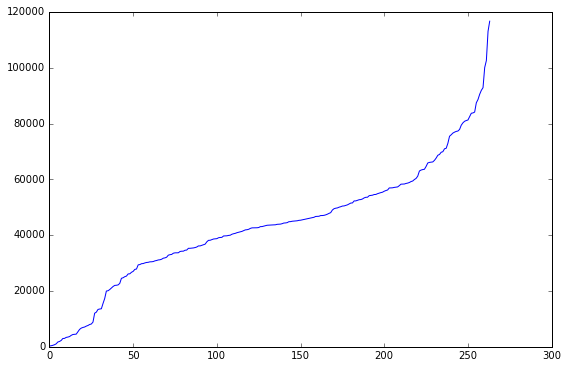

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(seq_data.index, seq_data['Unnamed: 1'])